<h1 style="text-align: center;">Ciencia de Datos en Turismo
</h3>
<h3 style="text-align: center;"> Tema 2. Fuentes de datos en turismo </h3>
<h3 style="text-align: center;"> Ejercicios propuestos</h3>

### Ejercicio 1

Este ejercicio ilustra la **paradoja de Simpson**, que consiste en la desaparición o inversión de una relación entre dos variables al considerar grupos diferenciados entre esas variable inducidos por una variable adicional. 

Para ellos tomamos dos variables: (1) GDP per capita para distintos países de la UE; (2) Noches en establecimientos turísticos por país de origen. Tomamos la serie 2014-2023, para las cuales existen datos en las dos bases. Ambas series se encuentran en Eurostat. Se agregan todos los datos de forma estructurada, indicando país y año en variables separadas.   

**(a)** Representar el grafo de dispersión GDP per capita - noches en establecimientos turísticos con todos los datos agregados (sin separar por año). Calcular la correlación entre las variables. 

**(b)** Filtrar los datos por países, graficar las nuevas series filtradas y recalcular la correlación entre variables por países o grupos de países. 

**(c)** Repetir los epígrafes anteriores suprimiendo los años de COVID (2020, 2021).

**(d)** Extraer conclusiones del análisis. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 5)

In [3]:
gdp = pd.read_csv("gdp.csv")
gdp

,DATAFLOW,LAST UPDATE,freq,unit,na_item,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:SDG_08_10(1.0),23/09/24 23:00:00,A,CLV10_EUR_HAB,B1GQ,AL,2000,1700.0,NaN
1,ESTAT:SDG_08_10(1.0),23/09/24 23:00:00,A,CLV10_EUR_HAB,B1GQ,AL,2001,1850.0,NaN
2,ESTAT:SDG_08_10(1.0),23/09/24 23:00:00,A,CLV10_EUR_HAB,B1GQ,AL,2002,1940.0,NaN
3,ESTAT:SDG_08_10(1.0),23/09/24 23:00:00,A,CLV10_EUR_HAB,B1GQ,AL,2003,2060.0,NaN
4,ESTAT:SDG_08_10(1.0),23/09/24 23:00:00,A,CLV10_EUR_HAB,B1GQ,AL,2004,2180.0,NaN
...,...,...,...,...,...,...,...,...,...
1868,ESTAT:SDG_08_10(1.0),23/09/24 23:00:00,A,CLV_PCH_PRE_HAB,B1GQ,UK,2015,1.6,NaN
1869,ESTAT:SDG_08_10(1.0),23/09/24 23:00:00,A,CLV_PCH_PRE_HAB,B1GQ,UK,2016,0.9,NaN
1870,ESTAT:SDG_08_10(1.0),23/09/24 23:00:00,A,CLV_PCH_PRE_HAB,B1GQ,UK,2017,1.1,NaN
1871,ESTAT:SDG_08_10(1.0),23/09/24 23:00:00,A,CLV_PCH_PRE_HAB,B1GQ,UK,2018,0.6,NaN


In [4]:
gdp["unit"].unique()

array(['CLV10_EUR_HAB', 'CLV_PCH_PRE_HAB'], dtype=object)

In [5]:
nights = pd.read_csv("nights_spent.csv")
nights

,DATAFLOW,LAST UPDATE,freq,unit,nace_r2,c_resid,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:TOUR_OCC_NINRAW(1.0),17/09/24 11:00:00,A,NR,I551,AFR,AL,2020,80.00,e
1,ESTAT:TOUR_OCC_NINRAW(1.0),17/09/24 11:00:00,A,NR,I551,AFR,AT,1990,79277.00,NaN
2,ESTAT:TOUR_OCC_NINRAW(1.0),17/09/24 11:00:00,A,NR,I551,AFR,AT,1991,69660.00,NaN
3,ESTAT:TOUR_OCC_NINRAW(1.0),17/09/24 11:00:00,A,NR,I551,AFR,AT,1992,84153.00,NaN
4,ESTAT:TOUR_OCC_NINRAW(1.0),17/09/24 11:00:00,A,NR,I551,AFR,AT,1993,87235.00,NaN
...,...,...,...,...,...,...,...,...,...,...
382731,ESTAT:TOUR_OCC_NINRAW(1.0),17/09/24 11:00:00,A,PCH_PRE,I553,ZA,TR,2020,-99.17,NaN
382732,ESTAT:TOUR_OCC_NINRAW(1.0),17/09/24 11:00:00,A,PCH_PRE,I553,ZA,TR,2021,6900.00,NaN
382733,ESTAT:TOUR_OCC_NINRAW(1.0),17/09/24 11:00:00,A,PCH_PRE,I553,ZA,TR,2022,-3.57,NaN
382734,ESTAT:TOUR_OCC_NINRAW(1.0),17/09/24 11:00:00,A,PCH_PRE,I553,ZA,UK,2013,58.79,NaN


In [6]:
nights["unit"].unique()

array(['NR', 'PCH_PRE'], dtype=object)

In [7]:
wanted_gdp = gdp[gdp["unit"] == 'CLV10_EUR_HAB']
wanted_nights = nights[(nights["unit"] == 'NR') & (nights["c_resid"] == "EUR")]

In [8]:
gdp_sub = wanted_gdp[["geo", "TIME_PERIOD", "OBS_VALUE"]].rename(columns={"geo": "country", "TIME_PERIOD": "year", "OBS_VALUE": "gdp"})
nights_sub = wanted_nights[["geo", "TIME_PERIOD", "OBS_VALUE"]].rename(columns={"geo": "country", "TIME_PERIOD": "year", "OBS_VALUE": "nights"})

In [9]:
print(len(gdp_sub), len(nights_sub))

938 2959


In [10]:
d = gdp_sub.merge(nights_sub, on=["country", "year"], how="inner")
d

,country,year,gdp,nights
0,AL,2020,3810.0,693346.0
1,AL,2020,3810.0,739569.0
2,AL,2020,3810.0,42752.0
3,AL,2020,3810.0,46223.0
4,AL,2020,3810.0,3471.0
...,...,...,...,...
2720,UK,2016,32060.0,150341580.0
2721,UK,2016,32060.0,361452050.0
2722,UK,2016,32060.0,160001740.0
2723,UK,2016,32060.0,211110470.0


In [11]:
len(d["country"].unique())

40

In [12]:
len(d["year"].unique())

19

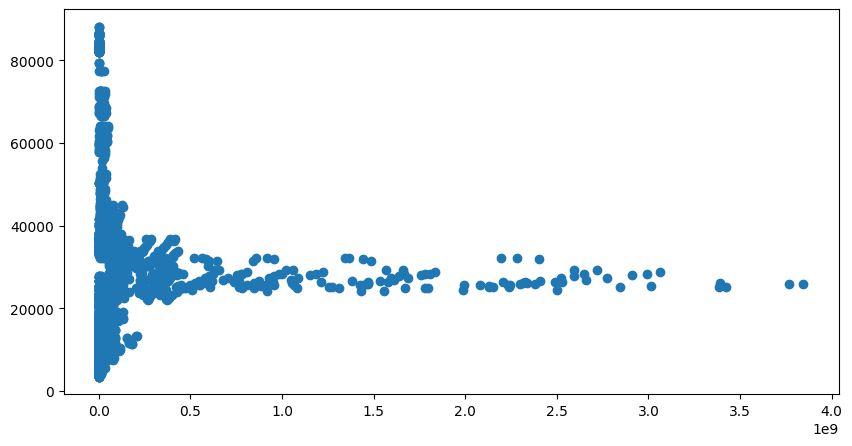

In [13]:
plt.scatter(d["nights"], d["gdp"])

In [23]:
d["gdp"].corr(d["nights"])

0.013937482235048402

In [25]:
countries = set(d["country"].unique())
countries

{'AL',
 'AT',
 'BE',
 'BG',
 'CH',
 'CY',
 'CZ',
 'DE',
 'DK',
 'EA19',
 'EA20',
 'EE',
 'EL',
 'ES',
 'EU27_2020',
 'EU28',
 'FI',
 'FR',
 'HR',
 'HU',
 'IE',
 'IS',
 'IT',
 'LT',
 'LU',
 'LV',
 'ME',
 'MK',
 'MT',
 'NL',
 'NO',
 'PL',
 'PT',
 'RO',
 'RS',
 'SE',
 'SI',
 'SK',
 'TR',
 'UK'}

In [27]:
corrs = []
for country in countries:
	cd = d[d["country"] == country]
	corr = cd["gdp"].corr(cd["nights"])
	corrs.append((country, corr))

### Ejercicio 2

En este curso trabajaremos con datos referentes a los alojamientos vacacionales en Canarias durante el periodo 2010-2021. Trataremos tres bases de datos: 

- Características de las propiedades que están o han estado abiertas durante ese periodo en Canarias [Fichero Airbnb_properties](https://alumnosulpgc-my.sharepoint.com/:x:/g/personal/juan_hernandez_ulpgc_es/EeYrbeFBYR1OjINagjy6MisBFCnHh2lLxlqM_-nkYiVZ_w?e=oWLGDp).
- Información de los clientes y comentarios dejados sobre las viviendas [Fichero Airbnb_reviews](https://alumnosulpgc-my.sharepoint.com/:x:/g/personal/juan_hernandez_ulpgc_es/EQhLfFpd9epGpxGenMQx5u8BpfnzRfs_VG51FwXP6tnflQ?e=mBqXfm).
- Información sobre los anfitriones [fichero Airbnb_host](https://alumnosulpgc-my.sharepoint.com/:x:/g/personal/juan_hernandez_ulpgc_es/Eaa3oetSDgZAtc5xa0hfAzMBHnMYfaGVZsGrUujOMgPv-Q?e=LbOIne).

La información de las variables se encuentra en el siguiente [glosario](https://alumnosulpgc-my.sharepoint.com/:w:/g/personal/juan_hernandez_ulpgc_es/ESzatil3opNJs04UDr3nqqkBechOAjvPe4Wk6rtKJIDJSQ?e=Sdu0Dv)
  
En primer lugar, nos hacemos una pregunta general de investigación, que es la que va a guiar nuestro análisis: ¿Qué factores determinan el éxito comercial de un alojamiento Airbnb en Canarias? Durante el estudio trataremos de averiguar cómo está la situación y qué debería hacerse para incrementar el éxito comercial de estos alojamientos. 

**Nota teórica** 

Según Hopken y Fuchs (2018), los datos útiles para realizar un trabajo de BI se pueden clasificar en tres: 

- Recursos: Cubren los recursos turísticos y no turísticos proporcionado o disponibles por el negocio (características del alojamientos, financiación, etc.)
- Performance: Cubren los indicadores de desempeño y económicos (ocupación, ingresos, etc.), así como satisfacción de los clientes.
- Demanda: Cubren información de los clientes, así como factores externos que influyen en la demanda (condiciones climáticas, eventos, etc.)

**Fin de la nota teórica** 

Recorrer las primeras etapas de un proceso de BI, esto es, extracción, transformación y almacenamiento de la información. Para ello, se realizarán las siguentes tareas: 

- Identificación de datos faltantes o incorrectos. 
- Limpieza de los datos, tratando los datos faltantes según un criterio razonable. 
- Eliminación de información no relevante o confusa (variables categóricas). 
- Clasificar datos según recursos, performance y demanda.
- Identificación y eliminación de datos duplicados.
- Homogeneización de la información: Normalización de variables continuas; Agrupación de categorías en variables con un elevado número de las mismas.
- Enriquecer los datos con información de otras fuentes, como por ejemplo, GDP y temperatura media del origen del usuario. Pensar en otras fuentes de datos que enriquezcan la información.
- Almacenar los datos en un formato adecuado. No eliminar las fuentes originales y sin normalizar.


### Ejercicio 3

**Nota teórica** 
Algunas distribuciones de frecuencias con datos reales tienen la propiedad de "cola ancha". Esta consiste en la observación de algunos datos extremos (outliers) pero con una suficiente masa de probabilidad que hace que sean significativos y representativos. Esto se produce en diversos fenómenos socioeconómicos, relacionados con la popularidad/funcionamiento de los individuos o entidades. En estas distribuciones, la gran mayoría de los individuos tienen popularidad baja o media, mientras que una parte pequeña pero representativa tienen mucha popularidad. 

Un ley de probabilidad continua que se adapta a este fenómeno es la *potencial o power-law*, que tienen la forma $y=x_0x^{-\alpha}$, siendo $\alpha>0$. Esta función es decreciente pero con una cola más ancha que otras probabilidades de tipo exponencial. 

Esta ley de probabilidad verifica que en escala logarítmica la densidad de probabilidad es lineal, esto es, tomando logaritmos a un lado y otro de la ecuación nos queda $\log(y)=\log(x_0) -\alpha \cdot \log(x)$.

Una forma de detectar si una distribución de frecuencias sigue una *power-law* es representar la distribución en escala logarítmica y observar si a partir de un valor $x>\bar{x}$ la distribución sigue una función lineal y decreciente. La pendiente de esa función lineal es el valor del parámetro $\alpha$. 

**Fin de la nota teórica** 

Realizar un análisis descriptivo de los datos (estadísticos descriptivos, distribución estadística, determinar si alguna distribución se podría ajustar con una *power-law*).
